In [287]:
# Make sure that the companion csv 'football_complete.csv' is in the SAME directory as this jupyter notebook
# Look up the documentation for any of these functions you don't understand; all of them are extremely helpful
# when looking at new data and trying to clean it up.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('football_complete.csv', index_col='Unnamed: 0')


In [6]:
# Example for plotting a basic chart to visualize the data

In [7]:
# Rushing attempts
x = list(df['Att'])

In [8]:
# Rushing yardage gained (total)
y = list(df['Yds'])

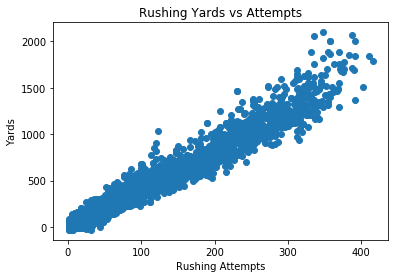

In [9]:
# Correlation between rushing yards and rushing attempts
plt.scatter(x, y)
plt.xlabel('Rushing Attempts')
plt.ylabel('Yards')
plt.title('Rushing Yards vs Attempts')
plt.show()
#plt.savefig('inclass_qbs.png') would save our graph to a png file if we desired

In [15]:
df.head(2)

,Unnamed: 1,Tm,Age,Pos,G,GS,Att,Yds,TD,Lng,...,TD.1,Lng.1,R/G,Y/G.1,Ctch%,Touch,Y/Tch,YScm,RRTD,Fmb
0,Edgerrin James*+\JameEd00,IND,21,RB,16,16,369,1553,13,72,...,4.0,54.0,3.9,36.6,75.6%,431,5.0,2139,17,8
1,Curtis Martin\MartCu00,NYJ,26,RB,16,16,367,1464,5,50,...,0.0,34.0,2.8,16.2,91.8%,412,4.2,1723,5,2


In [16]:
df.isnull().values.any()

False

In [17]:
df = df.fillna(0)

In [18]:
df.columns.tolist()

['Unnamed: 1',
 'Tm',
 'Age',
 'Pos',
 'G',
 'GS',
 'Att',
 'Yds',
 'TD',
 'Lng',
 'Y/A',
 'Y/G',
 'A/G',
 'Tgt',
 'Rec',
 'Yds.1',
 'Y/R',
 'TD.1',
 'Lng.1',
 'R/G',
 'Y/G.1',
 'Ctch%',
 'Touch',
 'Y/Tch',
 'YScm',
 'RRTD',
 'Fmb']

In [19]:
df = df.sort_values(by=['Yds', 'RRTD', 'Age'], ascending=False)

In [20]:
age_22 = df.loc[(df['Age']==22) & (df['GS']>9)]
age_22.head(2)

,Unnamed: 1,Tm,Age,Pos,G,GS,Att,Yds,TD,Lng,...,TD.1,Lng.1,R/G,Y/G.1,Ctch%,Touch,Y/Tch,YScm,RRTD,Fmb
3164,Edgerrin James*\JameEd00,IND,22,RB,16,16,387,1709,13,30,...,5.0,60.0,3.9,37.1,72.4%,450,5.1,2303,18,5
2227,Clinton Portis*\PortCl00,DEN,22,RB,13,13,290,1591,14,65,...,0.0,72.0,2.9,24.2,74.5%,328,5.8,1905,14,3


In [300]:
df['t_pts'] = (df['Rec'] + df['RRTD']*6 + df['YScm']*.1)
df['f_ppg'] = (df['t_pts']/df['G']).round(1)

In [301]:
df.head(2)

,Unnamed: 1,Tm,Age,Pos,G,GS,Att,Yds,TD,Lng,...,R/G,Y/G.1,Ctch%,Touch,Y/Tch,YScm,RRTD,Fmb,t_pts,f_ppg
1576,Adrian Peterson*+\PeteAd01,MIN,27,RB,16,16,348,2097,12,82,...,2.5,13.6,78.4%,388,6.0,2314,13,4,349.4,21.8
2215,Jamal Lewis*+\LewiJa00,BAL,24,fb/RB,16,16,387,2066,14,82,...,1.6,12.8,68.4%,413,5.5,2271,14,8,337.1,21.1


In [302]:
def name_split(name):
    name = name.split('\\')[0]
    return name

df['Unnamed: 1'] = df.apply(lambda row: name_split(row['Unnamed: 1']), axis=1)


def name_strip(name):
 name = name.strip('*+\\')
 return name

df['Unnamed: 1'] = df.apply(lambda row: name_strip(row['Unnamed: 1']), axis=1)
#better format the second time
    
#df['Unnamed: 1'] = df.apply(lambda x: x['Unnamed: 1'].replace('*+\\', ''), axis=1)

#df.apply(lambda x: ''.join([i for i in x['Unnamed: 1'] if not i.isdigit()]), axis = 1)

df
 



## TODO: Use df.apply() on our df so that our names column 
## (df['Unnamed: 1']) look human-readable like 'Firstname Lastname'

,Unnamed: 1,Tm,Age,Pos,G,GS,Att,Yds,TD,Lng,...,R/G,Y/G.1,Ctch%,Touch,Y/Tch,YScm,RRTD,Fmb,t_pts,f_ppg
1576,Adrian Peterson,MIN,27,RB,16,16,348,2097,12,82,...,2.5,13.6,78.4%,388,6.0,2314,13,4,349.4,21.8
2215,Jamal Lewis,BAL,24,fb/RB,16,16,387,2066,14,82,...,1.6,12.8,68.4%,413,5.5,2271,14,8,337.1,21.1
606,Barry Sanders,DET,29,RB,16,16,335,2053,11,82,...,2.1,19.1,66.0%,368,6.4,2358,14,3,352.8,22.0
310,Terrell Davis,DEN,26,RB,16,16,392,2008,21,70,...,1.6,13.6,65.8%,417,5.3,2225,23,2,385.5,24.1
0,Chris Johnson,TEN,24,RB,16,16,358,2006,14,91,...,3.1,31.4,70.4%,408,6.1,2509,16,3,396.9,24.8
312,Chris Johnson,TEN,24,RB,16,16,358,2006,14,91,...,3.1,31.4,70.4%,408,6.1,2509,16,3,396.9,24.8
2216,Ahman Green,GNB,26,RB,16,16,355,1883,15,98,...,3.1,22.9,83.3%,405,5.6,2250,20,7,395.0,24.7
1479,Barry Sanders,DET,26,RB,16,16,331,1883,7,85,...,2.8,17.7,67.7%,375,5.8,2166,8,0,308.6,19.3
1569,Shaun Alexander,SEA,28,RB,16,16,370,1880,27,88,...,0.9,4.9,51.7%,385,5.1,1958,28,5,378.8,23.7
1571,Tiki Barber,NYG,30,RB,16,16,357,1860,9,95,...,3.4,33.1,77.1%,411,5.8,2390,11,1,359.0,22.4


In [311]:

df = df.rename(columns = {'Unnamed: 1':'Player Names'})

df

# TODO: Set the names column as our index, rather than these arbitrary integers

,Tm,Age,Pos,G,GS,Att,Yds,TD,Lng,Y/A,...,R/G,Y/G.1,Ctch%,Touch,Y/Tch,YScm,RRTD,Fmb,t_pts,f_ppg
Player Names,,,,,,,,,,,,,,,,,,,,,
Adrian Peterson,MIN,27,RB,16,16,348,2097,12,82,6.0,...,2.5,13.6,78.4%,388,6.0,2314,13,4,349.4,21.8
Jamal Lewis,BAL,24,fb/RB,16,16,387,2066,14,82,5.3,...,1.6,12.8,68.4%,413,5.5,2271,14,8,337.1,21.1
Barry Sanders,DET,29,RB,16,16,335,2053,11,82,6.1,...,2.1,19.1,66.0%,368,6.4,2358,14,3,352.8,22.0
Terrell Davis,DEN,26,RB,16,16,392,2008,21,70,5.1,...,1.6,13.6,65.8%,417,5.3,2225,23,2,385.5,24.1
Chris Johnson,TEN,24,RB,16,16,358,2006,14,91,5.6,...,3.1,31.4,70.4%,408,6.1,2509,16,3,396.9,24.8
Chris Johnson,TEN,24,RB,16,16,358,2006,14,91,5.6,...,3.1,31.4,70.4%,408,6.1,2509,16,3,396.9,24.8
Ahman Green,GNB,26,RB,16,16,355,1883,15,98,5.3,...,3.1,22.9,83.3%,405,5.6,2250,20,7,395.0,24.7
Barry Sanders,DET,26,RB,16,16,331,1883,7,85,5.7,...,2.8,17.7,67.7%,375,5.8,2166,8,0,308.6,19.3
Shaun Alexander,SEA,28,RB,16,16,370,1880,27,88,5.1,...,0.9,4.9,51.7%,385,5.1,1958,28,5,378.8,23.7


In [46]:



# TODO: Make sure all of our data is numerical (type == float or int). This may mean
# dropping some columns, and our 'Ctch%' is also currently a str instead of float

In [ ]:
# To make comparisons, we will have a separate df of all players from 2017 that we can pull data from.
# We will then use that data (a row) to generate similarities based on cosines from our larger matrix
# All the linear algebra will actually be computed using the scikit-learn library along with pandas.
# We'll write a module for that later in the week once our data is ready for analysis.